In [1]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

import mandelbrot_MC as mb
from mandelbrot_MC_solvers import PureRandomSampling, LatinHypercubeSampling, OrthogonalSampling

# Mandelbrot set

/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val


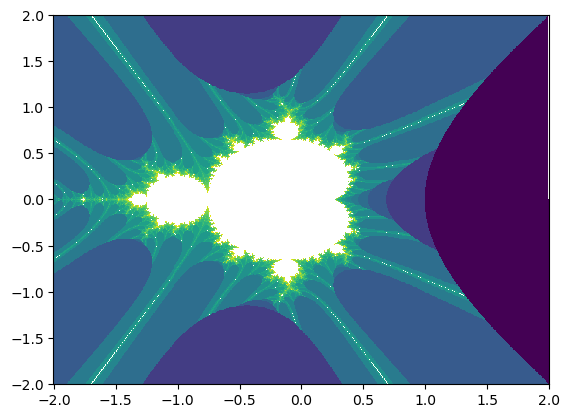

In [2]:
xRes = 500
yRes = 500

xVals = np.linspace(-2, 2, xRes)
yVals = np.linspace(-2, 2, yRes)

out = mb.mandelbrotDomain(xVals, yVals, 50, 2, 2)

fig, ax = plt.subplots()
ax.pcolormesh(xVals, yVals, out, norm=matplotlib.colors.LogNorm())
plt.show()


# Test Parameters

In [3]:
primes = np.asarray(mb.prime_sieve(300))
pSquares = np.square(primes)

SAMPLES       = pSquares[8:46]
ITERATIONS    = np.linspace(100, 5000, 40, dtype=int)
N_RUNS_STDERR = 10

In [4]:
trueSolver = PureRandomSampling(294134962255585091400930992399399635150)
print(f"seed: {trueSolver.get_state()}")
TRUE_AREA = trueSolver.parallelMandelbrotArea(1000000, 10000)
print(f"Estimated trueArea: {TRUE_AREA}")

seed: 330631048542874161574256756593015757228


/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val
/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val
/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: overflow encountered in power
  z = np.power(z, power) + val
/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: invalid value encountered in power
  z = np.power(z, power) + val
/Users/Kattelijn/Desktop/Stochastic-Simulation/mandelbrot_MC.py:19: RuntimeWarning: overflow encountered in power
 

Estimated trueArea: 1.5456


# Pure Random

In [5]:
solver = PureRandomSampling()

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

Area=1.5032


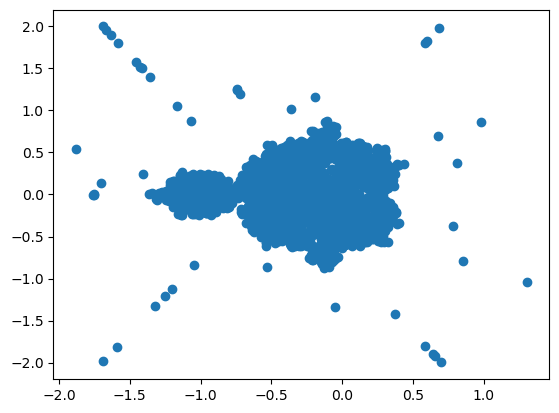

In [6]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

In [7]:
# solver = PureRandomSampling()
# print(f"seed: {solver.get_state()}")
# experimentName = "PureRandom"

# stdsPR, areasPR, areaPR = solver.iterSample_std(N_RUNS_STDERR, ITERATIONS, SAMPLES, trueArea=TRUE_AREA, verbose=True, parallel=True)
# np.savetxt(experimentName + "_stds.out", stdsPR)
# np.save(experimentName + "_areas", areasPR)

In [8]:
stdsPR = np.loadtxt("PureRandom" + "_stds.out")
areasPR = np.load("PureRandom_areas.npy")

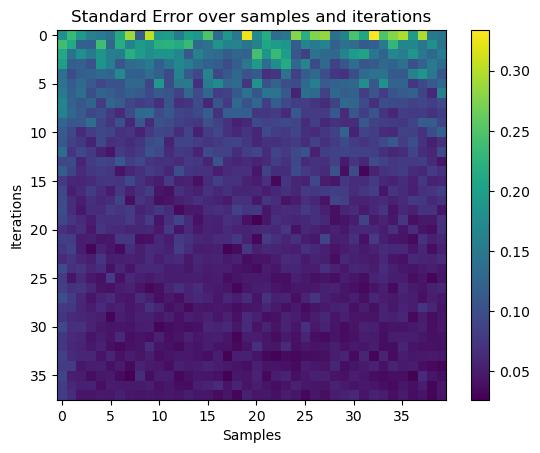

In [9]:
fig, ax = plt.subplots()

im = ax.imshow(stdsPR)

ax.set_xlabel("Samples")
ax.set_ylabel("Iterations")
ax.set_title("Standard Error over samples and iterations")
fig.colorbar(im, ax = ax)
plt.show()

# Latin Hypercube

## Single Calculation

In [10]:
solver = LatinHypercubeSampling()

nIter = 20000
nSamples = 20000

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

Area=1.5648


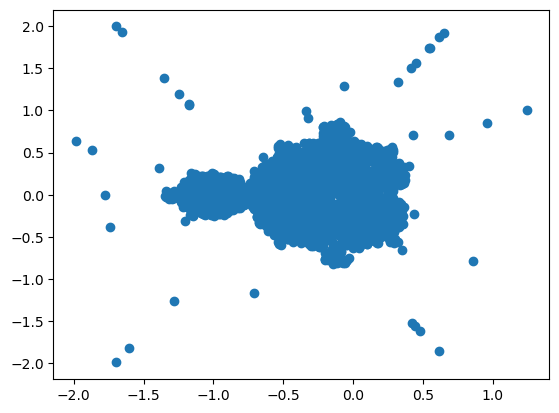

In [11]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

## Standard Error

In [12]:
# solver = LatinHypercubeSampling()
# print(f"seed: {solver.get_state()}")
# experimentName = "LatinHypercube"

# stdsLH, areasLH, areaLH = solver.iterSample_std(N_RUNS_STDERR, ITERATIONS, SAMPLES, trueArea=TRUE_AREA, verbose=True, parallel=True)
# np.savetxt(experimentName + "_stds.out", stdsLH)
# np.savetxt(experimentName + "_areas.out", areasLH)

In [13]:
# print(areaLH)
# lognorm = False

# fig, ax = plt.subplots()
# im = ax.imshow(stdsLH)

# ax.set_xlabel("Samples")
# # ax.set_xticks(samples)
# ax.set_ylabel("Iterations")
# # ax.set_yticks(iterations)
# ax.set_title("Standard Error over samples and iterations")
# fig.colorbar(im, ax = ax)
# plt.show()

# Orthogonal Sampling
*Can only use prime squared numbered amounts of samples*

## Single Calculation

In [14]:
solver = OrthogonalSampling()

nIter = 20000
nSamples = 19321 # 139**2

area, points = solver.mandelbrotArea(nIter, nSamples, scatter=True)

Area=1.5460897469075099


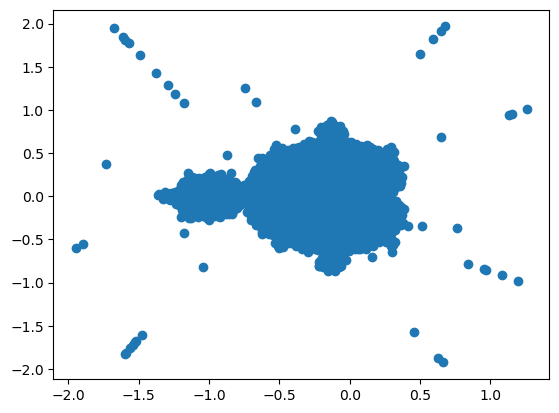

In [15]:
fig, ax = plt.subplots()

pointsx, pointsy = zip(*points)

ax.scatter(pointsx, pointsy)
print(f"Area={area}")
plt.show()

In [16]:
# solver = OrthogonalSampling()
# print(f"seed: {solver.get_state()}")
# experimentName = "Orthogonal"

# stdsORT, areasORT, areaORT = solver.iterSample_std(N_RUNS_STDERR, ITERATIONS, SAMPLES, trueArea=TRUE_AREA, verbose=True, parallel=True)
# np.savetxt(experimentName + "_stds.out", stdsORT)
# np.savetxt(experimentName + "_areas.out", areasORT)

In [17]:
# print(areaORT)
# lognorm = False

# fig, ax = plt.subplots()
# im = ax.imshow(stdsORT)

# ax.set_xlabel("Samples")
# # ax.set_xticks(samples)
# ax.set_ylabel("Iterations")
# # ax.set_yticks(iterations)
# ax.set_title("Standard Error over samples and iterations")
# fig.colorbar(im, ax = ax)
# plt.show()

ITERATIONS =  [ 100  225  351  476  602  728  853  979 1105 1230 1356 1482 1607 1733
 1858 1984 2110 2235 2361 2487 2612 2738 2864 2989 3115 3241 3366 3492
 3617 3743 3869 3994 4120 4246 4371 4497 4623 4748 4874 5000]
SAMPLES =  [  529   841   961  1369  1681  1849  2209  2809  3481  3721  4489  5041
  5329  6241  6889  7921  9409 10201 10609 11449 11881 12769 16129 17161
 18769 19321 22201 22801 24649 26569 27889 29929 32041 32761 36481 37249
 38809 39601]


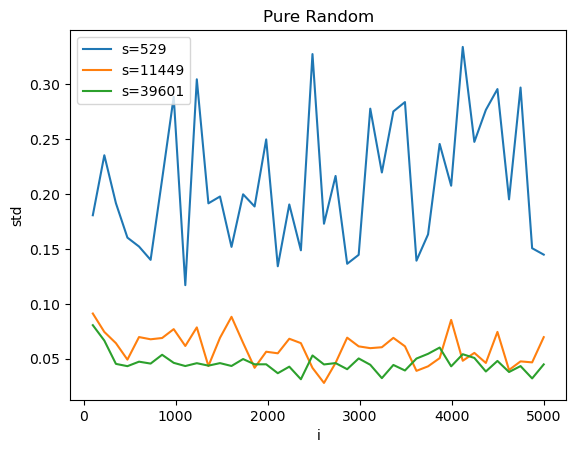

In [18]:
fig, ax = plt.subplots()
print("ITERATIONS = ", ITERATIONS)
print("SAMPLES = ", SAMPLES)
ax.plot(ITERATIONS, stdsPR[0,:], label=f"s={SAMPLES[0]}")
ax.plot(ITERATIONS, stdsPR[(len(SAMPLES)//2),:], label=f"s={SAMPLES[len(SAMPLES)//2]}")
ax.plot(ITERATIONS, stdsPR[-1,:], label=f"s={SAMPLES[-1]}")
# ax.plot(ITERATIONS, stdsLH[-1,:])
# ax.plot(ITERATIONS, stdsORT[-1,:])
plt.xlabel("i")
plt.ylabel("std")
plt.title("Pure Random")
plt.legend()
plt.show()

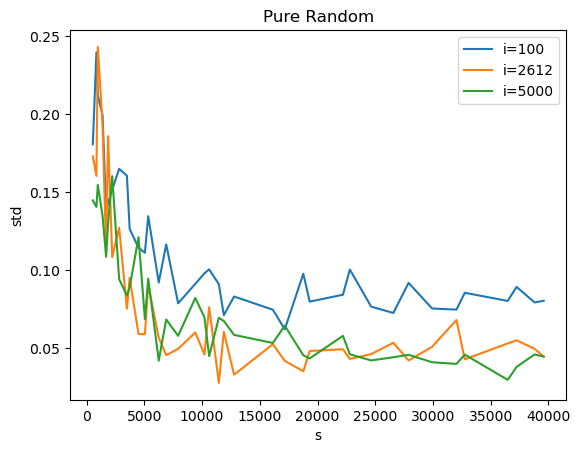

In [19]:
fig, ax = plt.subplots()

ax.plot(SAMPLES, stdsPR[:,0], label=f"i={ITERATIONS[0]}")
ax.plot(SAMPLES, stdsPR[:,(len(ITERATIONS)//2)], label=f"i={ITERATIONS[(len(ITERATIONS)//2)]}")
ax.plot(SAMPLES, stdsPR[:,-1], label=f"i={ITERATIONS[-1]}")
# ax.plot(SAMPLES, stdsLH[:,-1])
# ax.plot(SAMPLES, stdsORT[:,-1])
plt.xlabel("s")
plt.ylabel("std")
plt.title("Pure Random")
plt.legend()
plt.show()